# **Project**

Anurag Bhat (B20CS097)

In [22]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression , Ridge , LogisticRegression
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from scipy import stats
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from graphviz import Source
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score as auc
import warnings
warnings.filterwarnings('ignore')

In [23]:
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics

# **Reading & Pre-Processing Data**

In [24]:
# Read Dataset
df = pd.read_excel('/content/Dataset.xlsx')
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [25]:
# Splitting of data
from sklearn.model_selection import train_test_split
X= df.iloc[:,:-1] # get features (independent variable)
y= df.iloc[:,-1:] # get target (dependent variable)
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, random_state=99)

In [26]:
# Printing datasets to judge split
print(X_train)
print()
print(y_train)
print()
print(X_test)
print()
print(y_test)

                Airline Date_of_Journey   Source Destination  \
3727             IndiGo       6/06/2019    Delhi      Cochin   
1078  Multiple carriers       3/03/2019    Delhi      Cochin   
8587  Multiple carriers       3/03/2019    Delhi      Cochin   
541           Air India      24/04/2019  Kolkata    Banglore   
251           Air India       1/06/2019    Delhi      Cochin   
...                 ...             ...      ...         ...   
7890          Air India      21/05/2019    Delhi      Cochin   
1768  Multiple carriers       6/06/2019    Delhi      Cochin   
9929             IndiGo      18/03/2019   Mumbai   Hyderabad   
3240              GoAir      24/03/2019  Kolkata    Banglore   
7203              GoAir       3/04/2019    Delhi      Cochin   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
3727        DEL → HYD → COK    16:10         22:30   6h 20m      1 stop   
1078        DEL → HYD → COK    09:45         22:20  12h 35m      1 stop   
8587  

In [27]:
# Making indexes ordered then dropping column with unordered indices.
(X_train).reset_index(inplace = True, drop = True)
(X_test).reset_index(inplace = True, drop = True)
(y_test).reset_index(inplace = True, drop = True)
(y_train).reset_index(inplace = True, drop = True)

In [28]:
# Joining features and target ( in both test and train sets )
train_DF = X_train.join(y_train)
test_DF = X_test.join(y_test)
train_DF

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,6/06/2019,Delhi,Cochin,DEL → HYD → COK,16:10,22:30,6h 20m,1 stop,No info,6938
1,Multiple carriers,3/03/2019,Delhi,Cochin,DEL → HYD → COK,09:45,22:20,12h 35m,1 stop,No info,13838
2,Multiple carriers,3/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,18:50,14h 50m,1 stop,No info,15237
3,Air India,24/04/2019,Kolkata,Banglore,CCU → BLR,14:15,16:45,2h 30m,non-stop,No info,4880
4,Air India,1/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:45,19:15 02 Jun,23h 30m,2 stops,No info,10651
...,...,...,...,...,...,...,...,...,...,...,...
7473,Air India,21/05/2019,Delhi,Cochin,DEL → MAA → COK,06:05,09:25 22 May,27h 20m,1 stop,No info,7480
7474,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → BOM → COK,06:00,19:00,13h,1 stop,No info,11789
7475,IndiGo,18/03/2019,Mumbai,Hyderabad,BOM → HYD,09:10,10:40,1h 30m,non-stop,No info,4049
7476,GoAir,24/03/2019,Kolkata,Banglore,CCU → AMD → BLR,16:25,00:05 25 Mar,7h 40m,1 stop,No info,10198


In [29]:
# Get description of train set
train_DF.describe()

,Price
count,7478.000000
mean,9116.188018
std,4666.772723
min,1759.000000
25%,5281.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [30]:
# Get description of test set
test_DF.describe()

,Price
count,3205.000000
mean,9019.111388
std,4479.382152
min,1759.000000
25%,5201.000000
50%,8355.000000
75%,12373.000000
max,54826.000000


In [31]:
# Checking for null/ NA values
(train_DF).isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [32]:
# Checking for null/ NA values
(test_DF).isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# Dropping null values from train
train_DF.dropna(inplace=True)
train_DF

In [ ]:
# Dropping null values from test
test_DF.dropna(inplace=True)
test_DF

In [ ]:
# Check for duplicated values in joined data
(train_DF)[(train_DF).duplicated()]

In [36]:
# Drop duplicates value in data
(train_DF).drop_duplicates(keep='first',inplace=True)

In [37]:
# Convert time from hours to minutes by multiplication with 60
(train_DF)['Duration']=  (train_DF)['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
train_DF

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,6/06/2019,Delhi,Cochin,DEL → HYD → COK,16:10,22:30,380,1 stop,No info,6938
1,Multiple carriers,3/03/2019,Delhi,Cochin,DEL → HYD → COK,09:45,22:20,755,1 stop,No info,13838
2,Multiple carriers,3/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,18:50,890,1 stop,No info,15237
3,Air India,24/04/2019,Kolkata,Banglore,CCU → BLR,14:15,16:45,150,non-stop,No info,4880
4,Air India,1/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:45,19:15 02 Jun,1410,2 stops,No info,10651
...,...,...,...,...,...,...,...,...,...,...,...
7473,Air India,21/05/2019,Delhi,Cochin,DEL → MAA → COK,06:05,09:25 22 May,1640,1 stop,No info,7480
7474,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → BOM → COK,06:00,19:00,780,1 stop,No info,11789
7475,IndiGo,18/03/2019,Mumbai,Hyderabad,BOM → HYD,09:10,10:40,90,non-stop,No info,4049
7476,GoAir,24/03/2019,Kolkata,Banglore,CCU → AMD → BLR,16:25,00:05 25 Mar,460,1 stop,No info,10198


In [ ]:
# Convert time from hours to minutes by multiplication with 60
(test_DF)['Duration']=  (test_DF)['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_DF

In [39]:
# Convert departure, arrival and date of journey into numbered columns instead of 'a/b/c' representation.

# Dep_Time
(train_DF)["Dep_hour"] = pd.to_datetime(train_DF["Dep_Time"]).dt.hour
(train_DF)["Dep_min"] = pd.to_datetime(train_DF["Dep_Time"]).dt.minute
(train_DF).drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
(train_DF)["Arrival_hour"] = pd.to_datetime(train_DF.Arrival_Time).dt.hour
(train_DF)["Arrival_min"] = pd.to_datetime(train_DF.Arrival_Time).dt.minute
(train_DF).drop(["Arrival_Time"], axis = 1, inplace = True)

# Date_of_Journey - split the string at each '/' and seperate values
train_DF["Journey_day"] = train_DF['Date_of_Journey'].str.split('/').str[0].astype(int)
train_DF["Journey_month"] = train_DF['Date_of_Journey'].str.split('/').str[1].astype(int)
train_DF.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [40]:
# Convert departure, arrival and date of journey into numbered columns instead of 'a/b/c' representation.

# Dep_Time
test_DF["Dep_hour"] = pd.to_datetime(test_DF["Dep_Time"]).dt.hour
test_DF["Dep_min"] = pd.to_datetime(test_DF["Dep_Time"]).dt.minute
test_DF.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_DF["Arrival_hour"] = pd.to_datetime(test_DF.Arrival_Time).dt.hour
test_DF["Arrival_min"] = pd.to_datetime(test_DF.Arrival_Time).dt.minute
test_DF.drop(["Arrival_Time"], axis = 1, inplace = True)

# Date_of_Journey - split the string at each '/' and seperate values
test_DF["Journey_day"] = test_DF['Date_of_Journey'].str.split('/').str[0].astype(int)
test_DF["Journey_month"] = test_DF['Date_of_Journey'].str.split('/').str[1].astype(int)
test_DF.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [41]:
# Replace total stops by values 
# Label encoding assigns random values hence replacement done manually
train_DF['Total_Stops'].replace(['1 stop', 'non-stop'], [1, 0], inplace=True)
train_DF['Total_Stops'].replace(['2 stops', '3 stops', '4 stops'], [2, 3, 4], inplace=True)

In [42]:
# Replace total stops by values 
# Label encoding assigns random values hence replacement done manually
test_DF['Total_Stops'].replace(['non-stop','1 stop'], [0, 1], inplace=True)
test_DF['Total_Stops'].replace(['2 stops', '3 stops', '4 stops'], [2, 3, 4], inplace=True)

# **Initial Visualizations**

Text(0, 0.5, 'Price of one Ticket')

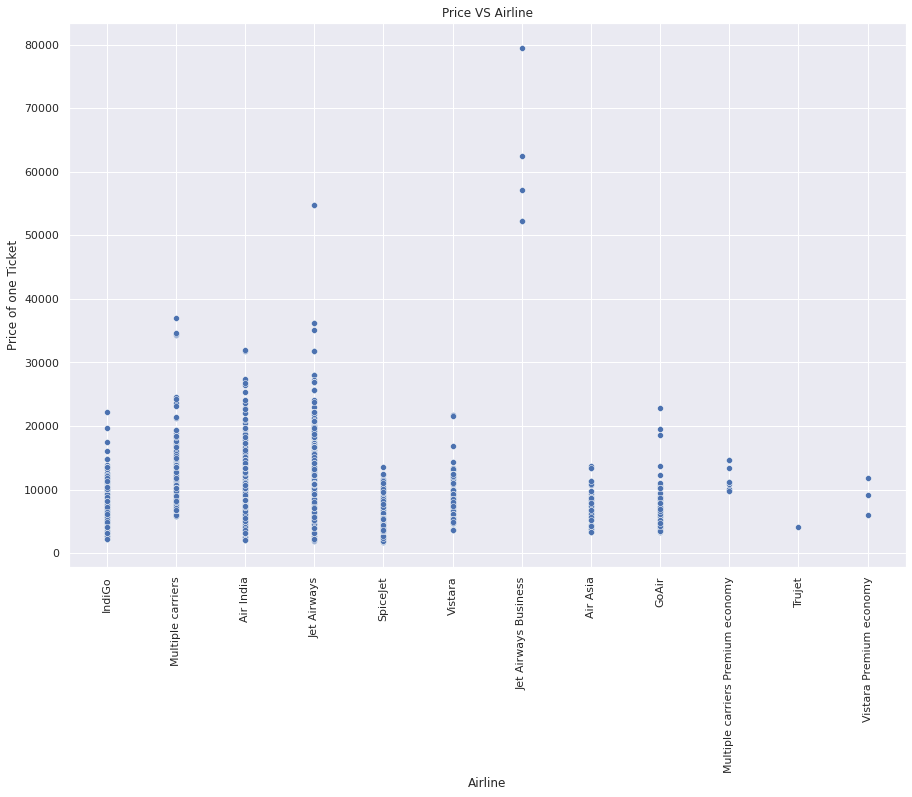

In [43]:
# Visualize the airline categories to judge the companies with less presence in data
# Price VS Airline
plt.figure(figsize = (15, 10))
plt.title('Price VS Airline')
sns.scatterplot(train_DF['Airline'], train_DF['Price'],data=train_DF)
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of one Ticket')
#plt.grid()

Text(0, 0.5, 'Price of one ticket')

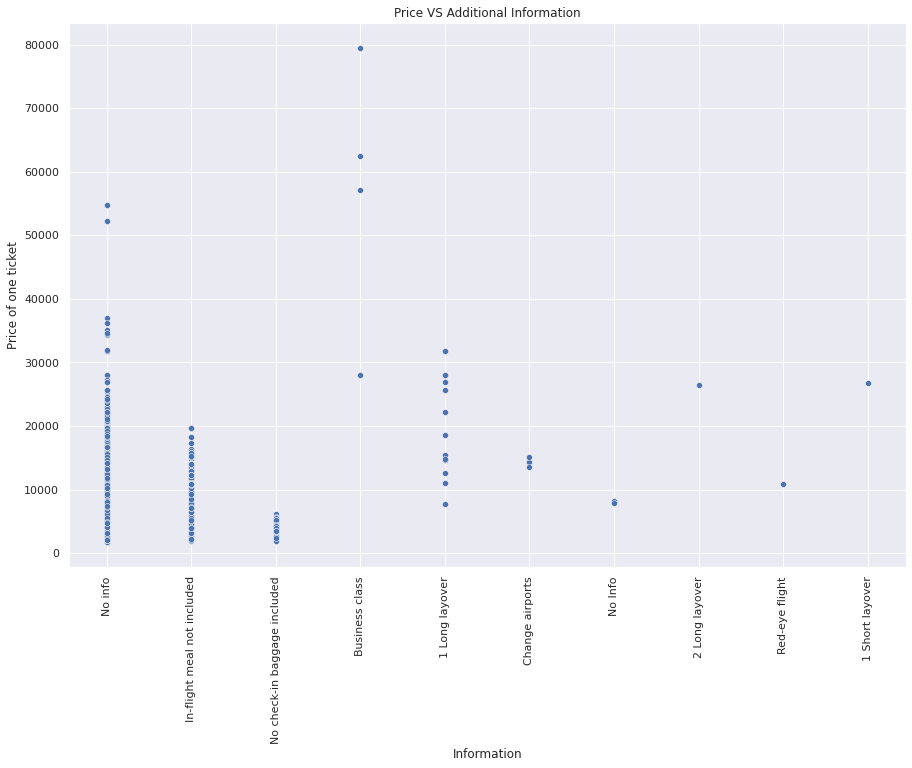

In [44]:
# Visualize the adding info categories to judge the information with less presence in data
# Price VS Additional Information
plt.figure(figsize = (15, 10))
plt.title('Price VS Additional Information')
sns.scatterplot(train_DF['Additional_Info'], train_DF['Price'],data=train_DF)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of one ticket')
#plt.grid()

In [45]:
# Simplifying dataset by replacing less present airlines with same cateogry.

train_DF['Airline'].replace(['Multiple carriers Premium economy'], ['Neglible'], inplace=True)
train_DF['Airline'].replace(['Trujet'], ['Neglible'], inplace=True)
train_DF['Airline'].replace(['Vistara Premium economy'], ['Neglible'], inplace=True)
train_DF['Airline'].replace(['Jet Airways Business'], ['Neglible'], inplace=True)

test_DF['Airline'].replace(['Multiple carriers Premium economy'], ['Neglible'], inplace=True)
test_DF['Airline'].replace(['Trujet'], ['Neglible'], inplace=True)
test_DF['Airline'].replace(['Vistara Premium economy'], ['Neglible'], inplace=True)
test_DF['Airline'].replace(['Jet Airways Business'], ['Neglible'], inplace=True)

In [46]:
# Additional_Info
train_DF['Additional_Info'].replace(['Change airports'], ['Neglible'], inplace=True)
train_DF['Additional_Info'].replace(['Business class'], ['Neglible'], inplace=True)
train_DF['Additional_Info'].replace(['2 Long layover'], ['Neglible'], inplace=True)
train_DF['Additional_Info'].replace(['1 Short layover'], ['Neglible'], inplace=True)
train_DF['Additional_Info'].replace(['Red-eye flight'], ['Neglible'], inplace=True)

test_DF['Additional_Info'].replace(['Change airports'], ['Neglible'], inplace=True)
test_DF['Additional_Info'].replace(['Business class'], ['Neglible'], inplace=True)
test_DF['Additional_Info'].replace(['2 Long layover'], ['Neglible'], inplace=True)
test_DF['Additional_Info'].replace(['1 Short layover'], ['Neglible'], inplace=True)
test_DF['Additional_Info'].replace(['Red-eye flight'], ['Neglible'], inplace=True)


In [47]:
data_dropped = train_DF.drop(["Price"], axis=1)

In [48]:
X_test = test_DF.drop(["Price"], axis=1)

# **Preprocessed datasets**

In [49]:
train_DF

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month
0,IndiGo,Delhi,Cochin,DEL → HYD → COK,380,1,No info,6938,16,10,22,30,6,6
1,Multiple carriers,Delhi,Cochin,DEL → HYD → COK,755,1,No info,13838,9,45,22,20,3,3
2,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,890,1,No info,15237,4,0,18,50,3,3
3,Air India,Kolkata,Banglore,CCU → BLR,150,0,No info,4880,14,15,16,45,24,4
4,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,1410,2,No info,10651,19,45,19,15,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,Air India,Delhi,Cochin,DEL → MAA → COK,1640,1,No info,7480,6,5,9,25,21,5
7474,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1,No info,11789,6,0,19,0,6,6
7475,IndiGo,Mumbai,Hyderabad,BOM → HYD,90,0,No info,4049,9,10,10,40,18,3
7476,GoAir,Kolkata,Banglore,CCU → AMD → BLR,460,1,No info,10198,16,25,0,5,24,3


In [50]:
X_test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month
0,SpiceJet,Mumbai,Hyderabad,BOM → HYD,90,0,No check-in baggage included,22,45,0,15,15,6
1,IndiGo,Banglore,New Delhi,BLR → DEL,175,0,No info,18,25,21,20,1,3
2,Air India,Kolkata,Banglore,CCU → DEL → COK → TRV → BLR,1470,3,No info,10,0,10,30,24,5
3,Jet Airways,Delhi,Cochin,DEL → BOM → COK,540,1,No info,10,0,19,0,27,5
4,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,685,1,No info,8,25,19,50,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,Jet Airways,Delhi,Cochin,DEL → BOM → COK,865,1,In-flight meal not included,14,0,4,25,21,3
3201,IndiGo,Chennai,Kolkata,MAA → CCU,140,0,No info,14,45,17,5,12,5
3202,Jet Airways,Delhi,Cochin,DEL → BOM → COK,450,1,In-flight meal not included,20,55,4,25,9,5
3203,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,1410,2,No info,19,45,19,15,9,5


# **Encoding of the data**

In [51]:
# We need to encode all nominal variables 
# Airline
# Source
# Destination 
# Route
# Additional_Info

# from sklearn.preprocessing import LabelEncoder
# lb= LabelEncoder()
# train_DF['Airline'] = lb.fit_transform(np.array(df['Airline']))
# train_DF['Source'] = lb.fit_transform(list(df['Source']))
# train_DF['Destination'] = lb.fit_transform(list(df['Destination']))
# train_DF['Route'] = lb.fit_transform(list(df['Route']))
# train_DF['Additional_Info'] = lb.fit_transform(list(df['Additional_Info']))

In [52]:
# Automating the process of encoding instead
data_train_categorical = data_dropped.select_dtypes(exclude=['int64', 'float','int32'])
data_test_categorical = X_test.select_dtypes(exclude=['int64', 'float','int32','int32'])

data_train_numerical = data_dropped.select_dtypes(include=['int64', 'float','int32'])
data_test_numerical  = X_test.select_dtypes(include=['int64', 'float','int32'])

In [53]:
#Label encode the categorical columns
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
data_train_categorical = data_train_categorical.apply(LabelEncoder().fit_transform)
data_test_categorical = data_test_categorical.apply(LabelEncoder().fit_transform)

In [55]:
X_values = pd.concat([data_train_categorical, data_train_numerical], axis=1)

In [57]:
X_values

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month
0,3,2,1,106,5,380,1,16,10,22,30,6,6
1,5,2,1,106,5,755,1,9,45,22,20,3,3
2,5,2,1,99,5,890,1,4,0,18,50,3,3
3,1,3,0,60,5,150,0,14,15,16,45,24,4
4,1,2,1,92,5,1410,2,19,45,19,15,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,1,2,1,116,5,1640,1,6,5,9,25,21,5
7474,5,2,1,99,5,780,1,6,0,19,0,6,6
7475,3,4,3,45,5,90,0,9,10,10,40,18,3
7476,2,3,0,55,5,460,1,16,25,0,5,24,3


In [58]:
y_values = train_DF['Price']
train_DF = pd.concat([data_test_categorical, data_test_numerical], axis=1)

In [59]:
Processed_data= pd.concat([X_values,y_values],axis=1)
Processed_data

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month,Price
0,3,2,1,106,5,380,1,16,10,22,30,6,6,6938
1,5,2,1,106,5,755,1,9,45,22,20,3,3,13838
2,5,2,1,99,5,890,1,4,0,18,50,3,3,15237
3,1,3,0,60,5,150,0,14,15,16,45,24,4,4880
4,1,2,1,92,5,1410,2,19,45,19,15,1,6,10651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,1,2,1,116,5,1640,1,6,5,9,25,21,5,7480
7474,5,2,1,99,5,780,1,6,0,19,0,6,6,11789
7475,3,4,3,45,5,90,0,9,10,10,40,18,3,4049
7476,2,3,0,55,5,460,1,16,25,0,5,24,3,10198


# **Visualization**

(500.0, 30000.0)

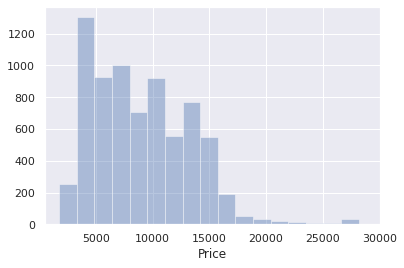

In [60]:
# Price Histogram
plt = sns.distplot(Processed_data['Price'],kde=False)
plt.set_xlim(500,30000)

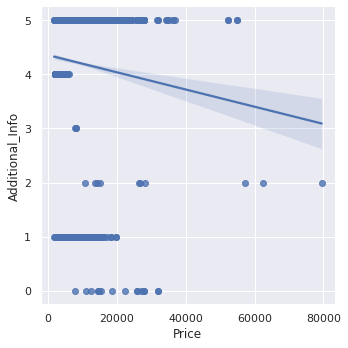

In [61]:
# Regression Line Plot
sns.lmplot(x='Price',y='Additional_Info',data=Processed_data)

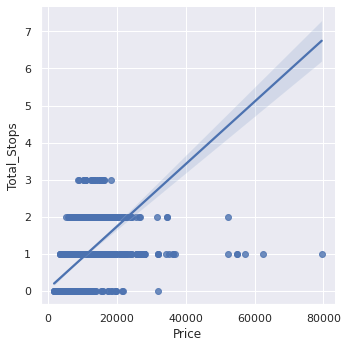

In [62]:
# Regression Line Plot
sns.lmplot(x='Price',y='Total_Stops',data=Processed_data)

# **New data out of preprocessed data to run model**

In [67]:
# now dumping the data
Processed_data.to_csv('Training_data.csv')

# now dumping test data
X_test.to_csv('Testing_data.csv')

In [66]:
import pandas as pd
import numpy as np
import pickle
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [68]:
train_DFF=pd.read_csv('Training_data.csv')

In [69]:
Df_testing=pd.read_csv('Testing_data.csv')

In [70]:
# splitting the newly formed dataset
X_1=train_DFF.drop(['Price'],axis=1)
y_1=train_DFF['Price']

In [71]:
X_1.drop(['Unnamed: 0'],axis=1,inplace=True)
X_1.head(10)

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month
0,3,2,1,106,5,380,1,16,10,22,30,6,6
1,5,2,1,106,5,755,1,9,45,22,20,3,3
2,5,2,1,99,5,890,1,4,0,18,50,3,3
3,1,3,0,60,5,150,0,14,15,16,45,24,4
4,1,2,1,92,5,1410,2,19,45,19,15,1,6
5,4,0,2,17,1,180,0,17,45,20,45,9,6
6,3,4,3,45,5,95,0,20,5,21,40,21,5
7,4,3,0,62,1,1335,1,20,0,18,15,24,5
8,3,2,1,99,5,895,1,10,35,1,30,27,5
9,4,2,1,111,1,1615,2,9,40,12,35,18,5


In [72]:
y_1.head(10)

0     6938
1    13838
2    15237
3     4880
4    10651
5     7229
6     2227
7    10844
8     6104
9    13029
Name: Price, dtype: int64

# **Splitting the new sets**

In [73]:
# Creating test and train data from already splitted test data for precise accuracy.
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.25, random_state = 99)

In [74]:
print("The size of training input is", (X_train_1).shape)
print("The size of testing input is", (X_test_1).shape)
print("")
print("The size of training output is", (y_train_1).shape)
print("The size of testing output is", (y_test_1).shape)

The size of training input is (5524, 13)
The size of testing input is (1842, 13)

The size of training output is (5524,)
The size of testing output is (1842,)


# **Applying models**

# **Decision Tree Regressor**

In [75]:
Max_depth = list(range(3,40))
hyper_params =dict(max_depth = Max_depth)
Dtree =GridSearchCV(DecisionTreeRegressor(),hyper_params,cv =10)
Dtree.fit(X_train_1,y_train_1)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29, 30, 31, 32, ...]})

In [76]:
Y_train_predictions = Dtree.predict(X_train_1) ##Predict train result
Y_test_predictions = Dtree.predict(X_test_1) ##Predict test result

In [77]:
r2_score((y_train_1).values, Y_train_predictions)

0.9736102800897161

In [78]:
r2_score(y_test_1, Y_test_predictions)

0.8320734218147905

# **KNN Regressor Model**

In [79]:
KM_range = list(range(1, 30))
hyper_params = dict(n_neighbors = KM_range)
regressor_knn = GridSearchCV(KNeighborsRegressor(), hyper_params, cv =10, scoring = 'neg_mean_squared_error')
regressor_knn.fit(X_train_1, y_train_1)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [80]:
Y_train_predictions =regressor_knn.predict(X_train_1)
Y_test_predictions =regressor_knn.predict(X_test_1) 

In [81]:
r2_score((y_train_1).values, Y_train_predictions)

0.6580593375615296

# **Random Forest Regressor**

In [83]:
tuning_of_params = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [1, 2, 3, 4]}
random_forest_regressor = RandomizedSearchCV(RandomForestRegressor(), tuning_of_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_forest_regressor.fit(X_train_1, y_train_1)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   scoring='neg_mean_absolute_error')

In [84]:
Y_train_predictions = random_forest_regressor.predict(X_train_1)
Y_test_predictions = random_forest_regressor.predict(X_test_1)

In [85]:
r2_score((y_train_1).values, Y_train_predictions)

0.9534785284918964

In [86]:
r2_score(y_test_1, Y_test_predictions)

0.8984693299031115

In [87]:
Final_score= r2_score(y_test_1, Y_test_predictions)
Final_score

0.8984693299031115

# **Best model according to score - Random Forest Regressor Model**